In [1]:
from torch.utils.data import DataLoader
from utils.data_handler import load_sm_data, DataSet

dataset = DataSet(load_sm_data())  
dataloader = DataLoader(dataset, batch_size = 32, drop_last = True)
next_batch = next(iter(dataloader))
print(next_batch.shape)

torch.Size([32, 96, 1])


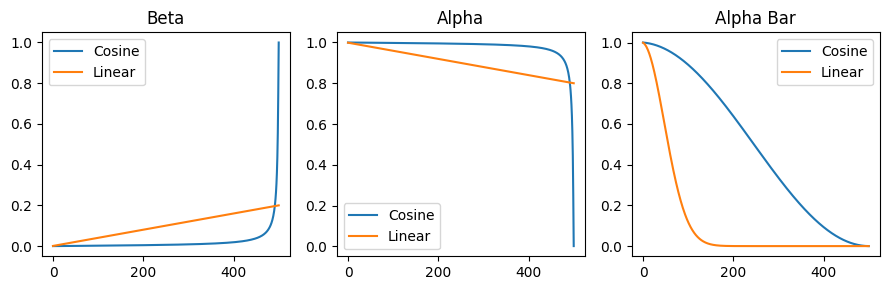

In [1]:
from utils.visualization import plot_schedules, plot_schedule
from diffusion_models.noise_schedulers import linear_schedule, cosine_schedule, linear_on_alphabars, mix_cos_lin


beta_min, beta_max = 1e-3, 0.2
T = 500

#beta_t_lin, alpha_t_lin, alphabar_t_lin = linear_schedule(beta_min, beta_max, T)  
#beta_t_cos, alpha_t_cos, alphabar_t_cos = cosine_schedule(T) 
beta_t_lin, alpha_t_lin, alphabar_t_lin = linear_on_alphabars(T)
beta_t_mix, alpha_t_mix, alphabar_t_mix = mix_cos_lin(T)

plot_schedules(beta_t_cos, beta_t_lin, alpha_t_cos, alpha_t_lin, alphabar_t_cos, alphabar_t_lin)

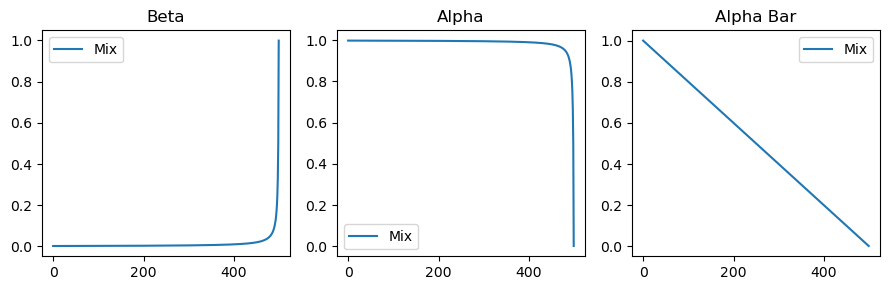

In [3]:
beta_t_mix, alpha_t_mix, alphabar_t_mix = mix_cos_lin(T)

plot_schedule(beta_t_mix, alpha_t_mix, alphabar_t_mix)

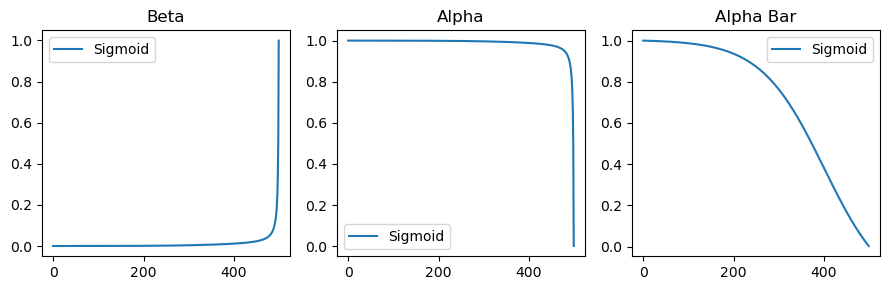

In [4]:
from diffusion_models.noise_schedulers import sigmoid_noiseschedule

beta_t_sig, alpha_t_sig, alphabar_t_sig = sigmoid_noiseschedule(T, start=-4, end=1, tau=0.7, clip_min=1e-9)

plot_schedule(beta_t_sig, alpha_t_sig, alphabar_t_sig, approach="Sigmoid")

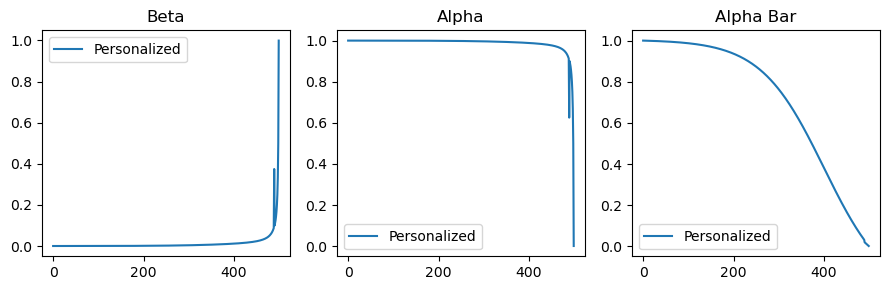

In [5]:
from diffusion_models.noise_schedulers import personalized_noise_schedule

beta_t_final, alpha_t_final, alphabar_t_final = personalized_noise_schedule(T)

plot_schedule(beta_t_final, alpha_t_final, alphabar_t_final, approach="Personalized")

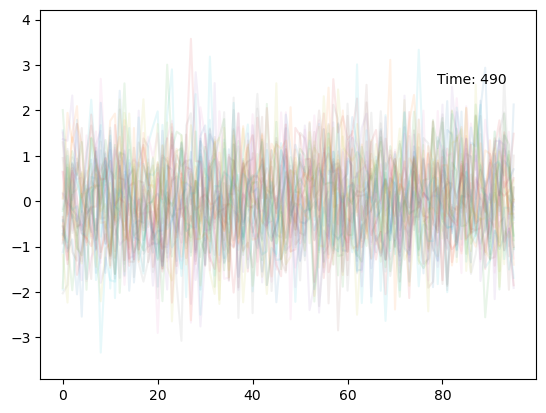

In [6]:
from celluloid import Camera    
import matplotlib.pyplot as plt
import numpy as np

def q_xt(x0, t, alpha_bars):
        mu = x0 * np.sqrt(alpha_bars[t])
        sigma = 1 - alpha_bars[t]
        return mu + sigma * np.random.randn(*x0.shape)


fig, ax = plt.subplots()  
camera = Camera(fig)  
for t in range(0, T, 10):
    for sample in range(next_batch.shape[0]):
        time_sample_t = q_xt(next_batch[sample], t, alphabar_t_final)
        ax.plot(time_sample_t, alpha=0.1)  
    
    # Add text showing frequency  
    text = ax.text(0.8, 0.8, f'Time: {t}', transform=ax.transAxes) 
    camera.snap()  

    
animation = camera.animate()  

# Save as GIF  
animation.save(f'./outputs/evolution_pers_{T}-T.gif', writer='pillow')  

plt.show()  


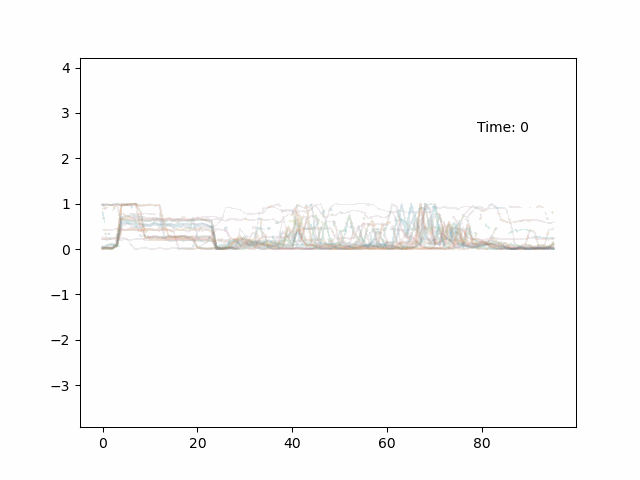

In [7]:
  
from IPython.display import Image  
Image(filename=f'./outputs/evolution_pers_{T}-T.gif')  
